<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Chef | Analysis Report</h1>

Cohort 1 | Machine Learning</h4>
<br>Jesal Panchal<br>
Hult International Business School<br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Chef Apprentice Insight report uncovers actionable insights for the revenue stream to drive efficient return on the cross-sell promotion – and will address current trends impacting the business. In this report, the code for the achieved R squared test score of 0.779 and GMB AUC score of .861 is included below. 

In [52]:
# importing libraries
import pandas as pd                      # data science essentials
import matplotlib.pyplot as plt          # data visualization
import seaborn as sns    # enhanced graphical output
import numpy as np
import statsmodels.formula.api as smf    # regression modeling
import random as rand                    # random number generation
#runned above sometimes might need to run again with my server
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split # training and testing
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.neighbors import KNeighborsRegressor    # KNN for Regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
#import gender_guesser.detector as gender
import pydotplus                                     # interprets dot objects
from sklearn.tree import export_graphviz             # exports graphics
from IPython.display import Image                    # displays on frontend
from six import StringIO                             # saves objects in memory
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.metrics import make_scorer                    # customizable scorer
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier        # random forest
from sklearn.ensemble import GradientBoostingClassifier    # gbm

# setting random seed
rand.seed(a = 327)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
chef = pd.read_excel(file)

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        
# displaying the first five observations of the DataFrame
chef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [53]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='num_of_names'):

    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))
        
#Dividing the 'NAME' column by num_of_names 
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = chef)
# checking results
#chef['num_of_names'].value_counts().sort_index()

In [54]:
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# renaming column to concatenate
email_df.columns = ['0' , 'email_domains']


# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, email_df['email_domains']],
                     axis = 1)


# printing value counts of personal_email_domain
chef.loc[: ,'email_domains'].value_counts()

# email domain types personal and professsional
personal_email_domains = ['@gmail.com', 
                          '@protonmail.com',
                          '@yahoo.com'] #icloud account

professional_email_domains  = [ '@amex.com', 
                        '@mcdonalds.com',
                        '@cocacola.com', 
                        '@jnj.com', 
                        '@merck.com',  
                        '@nike.com', 
                        '@apple.com',
                        '@ibm.com', 
                        '@dupont.com',    
                        '@ge.org',
                        '@microsoft.com', 
                        '@chevron.com',
                        '@unitedhealth.com',
                        '@exxon.com', 
                        '@travelers.com', 
                        '@boeing.com', 
                        '@verizon.com',
                        '@caterpillar.com',
                        '@mmm.com', 
                        '@pg.com', 
                        '@disney.com',
                        '@walmart.com',
                        '@pfizer.com', 
                        '@visa.com',
                        '@jpmorgan.com', 
                        '@unitedtech.com', 
                        '@cisco.com', 
                        '@goldmansacs.com', 
                        '@homedepot.com',
                        '@intel.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                      '@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in chef['email_domains']:
    
    if '@' + domain in personal_email_domains:
        placeholder_lst.append('personal_email')
        

    elif '@' + domain in professional_email_domains:
        placeholder_lst.append('professionl_email')

        
    elif'@' + domain in junk_email_domains:
        placeholder_lst.append('Junk')
    else:
        print('Unknown')

# concatenating with original DataFrame
chef['domain_group'] = pd.Series(placeholder_lst)


# checking results
chef['domain_group'].value_counts()

# get dummies for domain group
dummies = pd.get_dummies(chef['domain_group'])

# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, dummies],
                     axis = 1)

# converting the dummies to int64
chef['personal_email'] = np.int64(chef['personal_email'])
chef['professionl_email'] = np.int64(chef['professionl_email'])

In [55]:
#Feature Engineered Variables
###################################
##### IMPORTANT SECTION ###########
###################################

# log transforming Revenue, Avg Prep Time, Total Meals, Uni Meals, Ave time per site and PC Logins -> saving it to the dataset
chef['log_Revenue'] = np.log10(chef['REVENUE'])
chef['log_Avg_prep'] = np.log10(chef['AVG_PREP_VID_TIME']) #the distribution is normal
chef['log_Total_meals'] = np.log10(chef['TOTAL_MEALS_ORDERED']).round(2)
chef['log_Uni_meals'] = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_Avge_time_per_site']=  np.log10(chef['AVG_TIME_PER_SITE_VISIT'])
chef['log_PC_logins'] = np.log10(chef['PC_LOGINS'])  

# log total photos viewed
chef.loc[(chef['TOTAL_PHOTOS_VIEWED']==0), 'TOTAL_PHOTOS_VIEWED' ] = 0.01
chef['log_total_photos_viewed'] = np.log10(chef['TOTAL_PHOTOS_VIEWED']).round(2)


######

## The total delivery erros that occured
chef.loc[:,"delivery_errors"] = chef.loc[:,"EARLY_DELIVERIES"]+ chef.loc[:,"LATE_DELIVERIES"]

#the total percentage of delivery errors in the order 
chef.loc[:,"percentage_delivery_errors"] = (chef.loc[:,"EARLY_DELIVERIES"]+ 
                                            chef.loc[:,"LATE_DELIVERIES"])/chef.loc[:,"TOTAL_MEALS_ORDERED"].round(2)
                                 
chef['total_cancelled'] = chef['CANCELLATIONS_BEFORE_NOON'] + chef['CANCELLATIONS_AFTER_NOON']

## Ratio of customer care contact with number of orders
chef.loc[ : , "unhappy_customers"] = (chef.loc[:,"CONTACTS_W_CUSTOMER_SERVICE"]/

                                      chef.loc[:,"TOTAL_MEALS_ORDERED"]).round(2)
#Adding all the logins 
chef.loc[: ,'total_logins'] = chef.loc[: ,'MOBILE_LOGINS'] + chef.loc[: ,'PC_LOGINS']


#####

# the ratio of unique orders 
chef.loc[: , "unique_orders_ratio"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]/
                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)
# How many unique orders happened 
chef.loc[: , "re_unique_orders"] = (chef.loc[:,"TOTAL_MEALS_ORDERED"]-
                                   chef.loc[:,"UNIQUE_MEALS_PURCH"]).round(2)

chef['avg_price_per_order'] = chef['REVENUE']/chef['TOTAL_MEALS_ORDERED']

###################################
##### IMPORTANT SECTION ###########
###################################

# dummy variable for having a basement.
chef['has_mobile_login']   = 0
chef['has_late_deliveries']      = 0
chef['has_cancelled_before'] = 0
chef['has_cancelled_after']  = 0
chef['has_attended_master']= 0
chef['has_weekly_plan']    = 0
chef['below_median']        = 0
chef['unique_preferences']  = 0

for index, value in chef.iterrows():

    
    # Mobile logins
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'has_mobile_login'] = 1


    # Late Delivers
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'has_late_deliveries'] = 1
        
    
     # Cancelled before noon
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'has_cancelled_before'] = 1
    
    # Cancelled after noon
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'has_cancelled_after'] = 1
        
    
    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_attended_master'] = 1
        
    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_weekly_plan'] = 1    

    if chef.loc[index, 'MEDIAN_MEAL_RATING'] <= 3 and\
    chef.loc[index, 'avg_price_per_order'] > 34:
        chef.loc[index, 'below_median'] = 1
        
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] > 5 and \
    chef.loc[index, 'TASTES_AND_PREFERENCES'] == 1:
        chef.loc[index, 'unique_preferences'] = 1



In [56]:
# dropping categorical variables to prepare modeling
# preparing explanatory variable data
chef_data  = chef.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME','email_domains', 
                        'domain_group', 'REVENUE','log_Revenue','AVG_PREP_VID_TIME' ,
                        'log_Total_meals', 'TOTAL_PHOTOS_VIEWED', 'PC_LOGINS', 'AVG_TIME_PER_SITE_VISIT',
                        'UNIQUE_MEALS_PURCH', 'log_total_photos_viewed', 'avg_price_per_order', 'below_median'],
                                axis = 1)

 ## Revenue

In [57]:
# preparing response variable data
chef_target = chef.loc[ : , 'REVENUE'] #chef_data??
log_chef_target = chef.loc[ : , 'log_Revenue'] # ready for use later

###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)

x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            log_chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

####### starting ARD model #######
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7798
Testing Score : 0.779
ARD Train-Test Gap : 0.0008


## Cross Selling 

In [59]:
#Defining the Dictionary#

candidate_dict = {

 # full model
 'logit_full'   : ['TOTAL_MEALS_ORDERED',  
                   'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                    'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
                   'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
                   'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'Junk', 'personal_email', 
                   'professionl_email', 'log_Revenue', 'total_cancelled',
                   'log_Avg_prep', 'log_Uni_meals',  'log_Avge_time_per_site', 
                  'log_PC_logins', 're_unique_orders', 'unhappy_customers', 
                   'unique_preferences','num_of_names','unique_orders_ratio','below_median', 
                  'percentage_delivery_errors','delivery_errors','has_weekly_plan', 
                   'has_weekly_plan', 'has_cancelled_after'] 
                }

######## train/test split with the logit_sig variables###############
Chef_data   =  chef.loc[ : , candidate_dict['logit_full']]
Chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            Chef_data,
            Chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = Chef_target)# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 0.4, 0.2)
estimator_space    = pd.np.arange(100, 110, 25)
depth_space        = pd.np.arange(4, 9, 1)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 30,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(Chef_data, Chef_target)

# PREDICT step is not needed

# checking the best estimator for the model
gbm_tuned = full_gbm_cv.best_estimator_

# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)

# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

<ipython-input-59-35bfeac6ae13>:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 0.4, 0.2)
<ipython-input-59-35bfeac6ae13>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(100, 110, 25)
<ipython-input-59-35bfeac6ae13>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(4, 9, 1)
/Users/JesalP/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}
Tuned Training AUC: 0.6342
Training ACCURACY: 0.8869
Testing  ACCURACY: 0.9035
AUC Score        : 0.8612


<ipython-input-52-c2a9fd35b2a9>:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


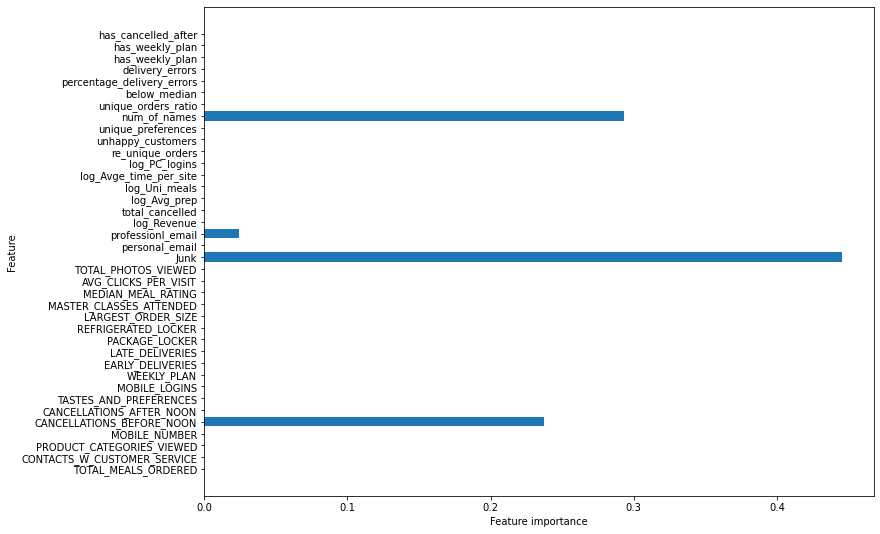

In [71]:
# INSTANTIATING a logistic regression model with tuned values based on hypertuning
tree_tuned = DecisionTreeClassifier(random_state = 219, min_samples_leaf = 16,
                                    max_depth = 3, criterion = 'gini', 
                                    splitter = 'best')

# FITTING the model object
tree_tuned_fit = tree_tuned.fit(x_train, y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# SCORING the results
#print('Training ACCURACY    :', tree_tuned.score(x_train, y_train).round(4))
#print('Testing  ACCURACY    :', tree_tuned.score(x_test, y_test).round(4))

# displaying and saving the gap between training and testing
#print('Tree Train-Test Gap  :', abs(tree_tuned_train_score - tree_tuned_test_score).round(4))
Tree_tuned_test_gap = abs(tree_tuned_train_score - tree_tuned_test_score).round(4)

#print('AUC Score            :', roc_auc_score(y_true  = y_test,
#                                          y_score = tree_tuned_pred).round(4))


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

# plotting feature importance
plot_feature_importances(tree_tuned,
                         train  = Chef_data,
                         export = False)

## Insights

Based on the model, it is noted that when customers fill out their entire information the better it is for our organization. In the graph, it shows that the ones that provided a full name more likely serious about our service. The customers that provided all information and didn’t mind adding their professional email can conclude they’re working. This has impacted cross-selling positively. Therefore, it is recommended to nudge other customers to update their profiles and add a professional email. This can lead to another campaign or promotion directed towards a specific company. 

On average there’s a 15.23% frequency of unique orders being made. Many customers are content or have figured out the meals they’re enjoying. This target demographic could be working people and want comfort food at the end of the day. Plus, they would want something easier to prep after a long day. It is advised to sustain these customers by providing them with the food they are familiar with based on their preferences. These consumers are 20% likely to try something new and only 25% have unique preferences. Recommended to ensure that the weekly plan choices are similar to their choices, so they’re more likely to register for a plan to get the discount. 

## Conclusion

As Apprentice Chef seeks clarity and confidence in the promotion subscribers, it’s more important that we continue to track people that continue to purchase and don’t mind providing us with their full names and professional emails. The trends discovered in this report will continue to impact the revenue stream. 